<a href="https://colab.research.google.com/github/samridhikapoor/Brain_cancer_detection/blob/main/Brain_Cancer_detection_using_DL_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/sh/8v33hgbjd0m5t6o/AADE8XUsDyA-ztjIRfQdMXCga?dl=0

--2022-04-02 17:52:05--  https://www.dropbox.com/sh/8v33hgbjd0m5t6o/AADE8XUsDyA-ztjIRfQdMXCga?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/8v33hgbjd0m5t6o/AADE8XUsDyA-ztjIRfQdMXCga [following]
--2022-04-02 17:52:05--  https://www.dropbox.com/sh/raw/8v33hgbjd0m5t6o/AADE8XUsDyA-ztjIRfQdMXCga
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfcf3040b53dcccdafacae6acef.dl.dropboxusercontent.com/zip_download_get/BGDqdORA1K3iWcn_-EWvaX5Vr9WwHhXWG3EUB-i8yIXHiMHyzGLzzY8LMEO6fmB3rxE3-Lf4fp8gvxRIhh8NomZfQq29EFPzYWX42-jMWR8slQ# [following]
--2022-04-02 17:52:07--  https://ucfcf3040b53dcccdafacae6acef.dl.dropboxusercontent.com/zip_download_get/BGDqdORA1K3iWcn_-EWvaX5Vr9WwHhXWG3EUB-i8yIXHiMHyzGLzzY8LMEO6fmB3rxE3-Lf4fp8gv

In [ ]:
!unzip /content/AADE8XUsDyA-ztjIRfQdMXCga?dl=0

Archive:  /content/AADE8XUsDyA-ztjIRfQdMXCga?dl=0
mapname:  conversion of  failed
   creating: Brain Tumor Data Set/
   creating: Brain Tumor Data Set/Healthy/
   creating: Brain Tumor Data Set/Brain Tumor/
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (2).jpg  
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (2).tif  
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (3).jpg  
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (3).tif  
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (4).jpg  
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (4).tif  
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (5).jpg  
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (5).tif  
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (6).jpg  
 extracting: Brain Tumor Data Set/Bra

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import shutil


In [ ]:
ROOT_DIR="/content/Brain Tumor Data Set"
number_of_images={}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)) )

number_of_images.items()

dict_items([('Healthy', 2087), ('Brain Tumor', 2513)])

###### 70% FOR TRAIN, 15% FOR TEST, 15% FOR VALIDATION 

In [ ]:
def folder_creation(path,per_split):                                                                                                  
   #we will create folders for storing data for train, test amd validation sets separately.
  if not os.path.exists("./"+path):
   os.mkdir("./"+path)

   for dir in os.listdir(ROOT_DIR):
    os.makedirs("./"+path+"/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)),size=(math.floor(per_split*number_of_images[dir])-5),replace=False):
      O=os.path.join(ROOT_DIR,dir,img)
      D=os.path.join("./"+path,dir)
      shutil.copy(O,D)
      os.remove(O)
  else: 
     print(f"{path}folder has been created")

In [ ]:
folder_creation("train",0.7)

In [ ]:
folder_creation("val",0.15)

In [ ]:
folder_creation("test",0.15)

In [ ]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator
import keras 

In [ ]:
# model = Sequential()

# model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', input_shape = (224, 224, 3)))

# model.add(Conv2D(filters = 36, kernel_size = (3, 3), activation = 'relu'))
# model.add(MaxPool2D(pool_size = (2, 2)))

# model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
# model.add(MaxPool2D(pool_size = (2, 2)))

# model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
# model.add(MaxPool2D(pool_size = (2, 2)))

# model.add(Dropout(rate = 0.25))
# model.add(Flatten())
# model.add(Dense(units = 64, activation = 'relu'))
# model.add(Dropout(rate = 0.25))
# model.add(Dense(units = 1, activation = 'sigmoid'))

# model.summary()

In [ ]:
# model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])

# Prep of data

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input

In [ ]:
def preprocessingImages1(path): 
  """
  input : Path
  output : Pre processed images
  """
  image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2,preprocessing_function= preprocess_input , horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path , target_size =(224,224), batch_size= 32, class_mode= 'binary')

  return image

In [ ]:
path="/content/train"
train_data= preprocessingImages1(path)

Found 3209 images belonging to 2 classes.


In [ ]:
def preprocessingImages2(path):
  """
  input : Path
  output : Pre processed images
  """
  image_data = ImageDataGenerator(preprocessing_function= preprocess_input)
  image = image_data.flow_from_directory(directory=path , target_size =(224,224), batch_size= 32, class_mode= 'binary')

  return image

In [ ]:
path="/content/test"
test_data=preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [ ]:
path="/content/val"
val_data=preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [ ]:
## Call back
from keras.callbacks import ModelCheckpoint, EarlyStopping

#model checkpoint
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor='val_accuracy', verbose=1, save_best_only= True)

#Early stopping
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=3, verbose=1)

cb=[mc, es]

# Training

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet
import keras

In [ ]:
base_model = MobileNet(input_shape=(224,224,3), include_top= False)

17235968/17225924 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units=1, activation='sigmoid')(X)

model = Model(base_model.input, X)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
model.compile(optimizer='rmsprop', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
## Call back
from keras.callbacks import ModelCheckpoint, EarlyStopping

#model checkpoint
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor='val_accuracy', verbose=1, save_best_only= True)

#Early stopping
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=3, verbose=1)

cb=[mc, es]

In [ ]:
hist = model.fit_generator(train_data, steps_per_epoch=8, epochs=30, validation_data=val_data, validation_steps=16, callbacks=cb)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.7652 - accuracy: 0.8750
Epoch 1: val_accuracy did not improve from 0.87695
8/8 [==============================] - 7s 840ms/step - loss: 0.7652 - accuracy: 0.8750 - val_loss: 1.1291 - val_accuracy: 0.8340
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 1.6953 - accuracy: 0.8125
Epoch 2: val_accuracy did not improve from 0.87695
8/8 [==============================] - 6s 805ms/step - loss: 1.6953 - accuracy: 0.8125 - val_loss: 2.2326 - val_accuracy: 0.7285
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 1.6470 - accuracy: 0.8203
Epoch 3: val_accuracy did not improve from 0.87695
8/8 [==============================] - 6s 800ms/step - loss: 1.6470 - accuracy: 0.8203 - val_loss: 1.2394 - val_accuracy: 0.8418
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.9682 - accuracy: 0.8711
Epoch 4: val_accuracy improved from 0.87695 to 0.91992, saving model to bestmodel.h5
8/8 [==

In [ ]:
from keras.models import load_model

In [ ]:
#load best fit model  

model= load_model("/content/bestmodel.h5")

In [ ]:
acc= model.evaluate_generator(test_data)[1]
print("\n")
print(f"Our model accuracy is: {acc*100} % ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.




Our model accuracy is: 96.61266803741455 % 


In [ ]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show>

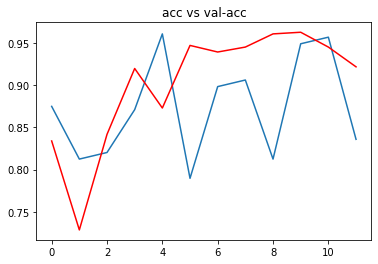

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')
plt.title("acc vs val-acc")
plt.show

<function matplotlib.pyplot.show>

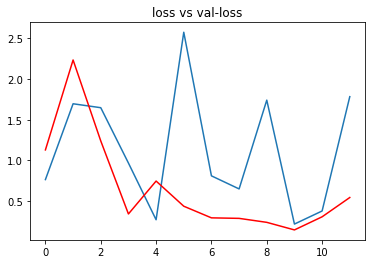

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')
plt.title("loss vs val-loss")
plt.show

In [ ]:
from keras.preprocessing import image

[[1.]]
non cancerous


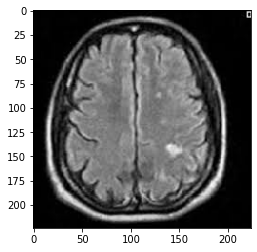

In [ ]:
#Insert path of the image from the data-set 

path = "/content/train/Healthy/Not Cancer  (1006).jpg"
img = image.load_img(path, target_size=(224, 224) )

i=image.img_to_array(img)/255
#i=preprocess_input(i)
input_arr=np.array([i])
input_arr.shape
predictions=model.predict(input_arr)
print(predictions)

if predictions > 0.6:
  print("non cancerous")
else :
  print("cancerous")
#to display the image
plt.imshow(input_arr[0])
plt.show()
input_arr.shape
input_arr =np.expand_dims(input_arr, axis=0)